## 支持向量機

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [7]:
X = iris.data[0:100,2:4]

In [8]:
y = iris.target[0:100]

In [11]:
from sklearn.svm import SVC
#?SVC
clf1 = SVC(kernel="linear")
clf1.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression()
clf2.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
def plot_estimator(estimator, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.plot()
    plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.brg)
    plt.xlabel('Petal.Length')
    plt.ylabel('Petal.Width')
    plt.show()


Populating the interactive namespace from numpy and matplotlib


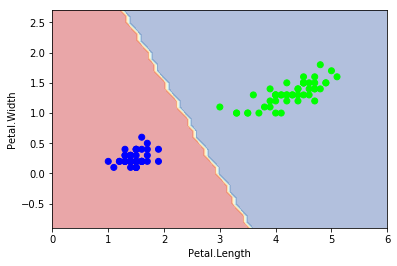

In [17]:
% pylab inline
import numpy as np
from matplotlib import pyplot as plt
plot_estimator(clf1, X,y)

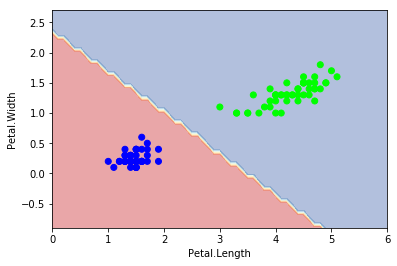

In [18]:
plot_estimator(clf2, X,y)

### 決定正則項 C

In [19]:
data = np.array([[-1,2,0],[-2,3,0],[-2,5,0],[-3,-4,0],[-0.1,2,0],[0.2,1,1],[0,1,1],[1,2,1], [1,1,1], [-
0.4,0.5,1],[2,5,1]])

In [20]:
X = data[:, :2]
Y = data[:,2]


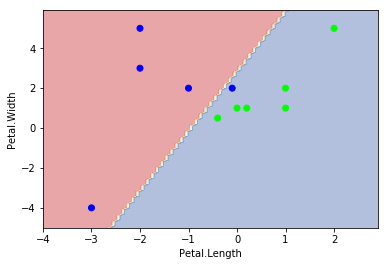

In [21]:
clf = SVC(C=1.0, kernel='linear')
clf.fit(X, Y)
plot_estimator(clf,X,Y)


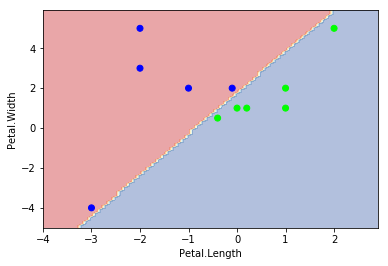

In [22]:
clf = SVC(C=10000.0, kernel='linear')
clf.fit(X, Y)
plot_estimator(clf,X,Y)

### 比較不同 Kernel

In [25]:
X = iris.data[0:100,2:4]
y = iris.target[0:100]

In [27]:
clf1 = SVC(kernel="rbf")
clf1.fit(X, y)

clf2 = SVC(kernel="poly")
clf2.fit(X, y)

clf3 = SVC(kernel="linear")
clf3.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

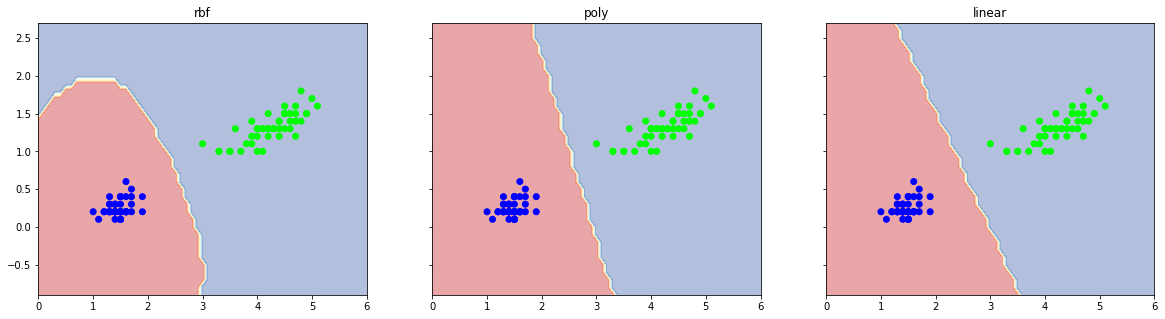

In [30]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(20, 5))

for idx, clf, title in zip([0,1,2],[clf1, clf2, clf3], ['rbf', 'poly', 'linear']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx].contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
    axarr[idx].scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.brg)
    axarr[idx].set_title(title)  

In [29]:
a = ['rbf', 'poly', 'linear']
b = [1    ,      2,        3]
for rec in zip(a,b):
    print(rec)

for i, j in zip(a,b):
    print(i,j)

('rbf', 1)
('poly', 2)
('linear', 3)
rbf 1
poly 2
linear 3


In [31]:
X = iris.data[:,[2,3]]
y = iris.target

In [32]:
clf1 = SVC(kernel="rbf")
clf1.fit(X, y)

clf2 = SVC(kernel="poly")
clf2.fit(X, y)

clf3 = SVC(kernel="linear")
clf3.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

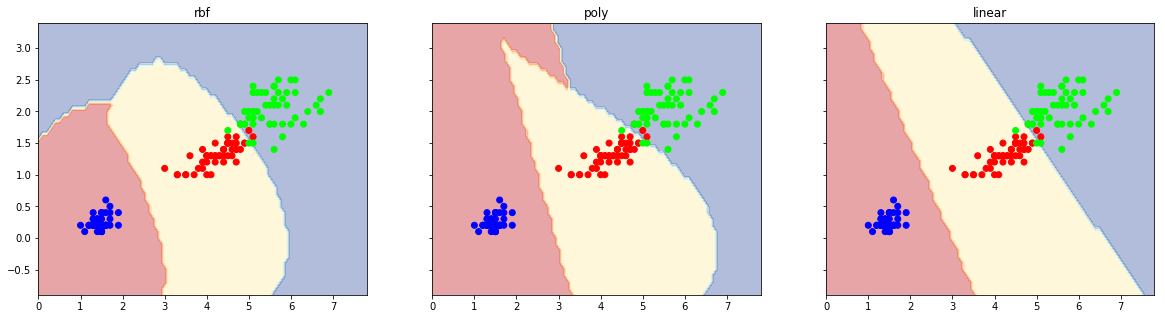

In [33]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(20, 5))

for idx, clf, title in zip([0,1,2],[clf1, clf2, clf3], ['rbf', 'poly', 'linear']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx].contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
    axarr[idx].scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.brg)
    axarr[idx].set_title(title)  

## 簡單語音助理

In [34]:
! pip install SpeechRecognition

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [36]:
! pip install pyaudio

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [38]:
import speech_recognition
r = speech_recognition.Recognizer()

with speech_recognition.Microphone() as source:
    r.adjust_for_ambient_noise(source)
    audio = r.listen(source)
    
r.recognize_google(audio, language='zh-TW')

'大家好中午我想吃飯'

In [39]:
qa = {
 '早安': '安安',
 '午安': '吃午飯沒',
 '再見': '掰掰',
    
}

In [40]:
import speech_recognition

def listenTo():
    r = speech_recognition.Recognizer()

    with speech_recognition.Microphone() as source:
        r.adjust_for_ambient_noise(source)
        audio = r.listen(source)

    return r.recognize_google(audio, language='zh-TW')

In [41]:
qa.get(listenTo(), '我現在還不聰明 等我變聰明以後再回答你')

'吃午飯沒'

In [42]:
!pip install gTTS

  Running setup.py bdist_wheel for gTTS: started
  Running setup.py bdist_wheel for gTTS: finished with status 'done'
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\ac\d3\52\db6c154b20dfaab7e0b514eb5eef92cecd057e40e16fdda58b
  Running setup.py bdist_wheel for bs4: started
  Running setup.py bdist_wheel for bs4: finished with status 'done'
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\a0\b0\b2\4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
  Running setup.py bdist_wheel for gtts-token: started
  Running setup.py bdist_wheel for gtts-token: finished with status 'done'
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\dd\11\61\33f7e51bf545e910552b2255eead2a7cd8ef54064b46dceb34
Successfully built gTTS bs4 gtts-token


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [43]:
! pip install pygame

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [46]:
from gtts import gTTS
from pygame import mixer

mixer.init()

import tempfile
def speak(sentence):
    with tempfile.NamedTemporaryFile(delete=False) as fp:
        tts = gTTS(text=sentence, lang='zh-tw')
        tts.save("{}.mp3".format(fp.name))
        mixer.music.load('{}.mp3'.format(fp.name))
        mixer.music.play()
        
speak('九四八七九四狂')

In [ ]:
speak(qa.get(listenTo(), '我現在還不聰明 等我變聰明以後再回答你'))

## NLU
- http://www.crownpku.com/2017/07/27/%E7%94%A8Rasa_NLU%E6%9E%84%E5%BB%BA%E8%87%AA%E5%B7%B1%E7%9A%84%E4%B8%AD%E6%96%87NLU%E7%B3%BB%E7%BB%9F.html
- https://rasa.com/docs/nlu/

## TensorFlow

In [47]:
! pip install tensorflow

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [48]:
import tensorflow as tf
hello = tf.constant('Hello World')
hello

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


<tf.Tensor 'Const:0' shape=() dtype=string>

In [49]:
sess = tf.Session()
sess

In [50]:
sess.run(hello)

b'Hello World'

In [51]:
sess.close()

In [52]:
x = tf.constant(2)
y = tf.constant(3)
with tf.Session() as sess:
    print(sess.run(x+y))


5


### Operation (操作)

In [53]:
x = tf.constant(2)
y = tf.constant(3)
with tf.Session() as sess:
    print(sess.run(x+y))
    print(sess.run(x-y))
    print(sess.run(x*y))
    print(sess.run(x/y))

5
-1
6
0.6666666666666666


### Placeholder (占位符)

In [54]:
x = tf.placeholder(tf.int32)
y = tf.placeholder(tf.int32)

In [55]:
x

<tf.Tensor 'Placeholder:0' shape=<unknown> dtype=int32>

In [56]:
type(x)

tensorflow.python.framework.ops.Tensor

### 定易操作

In [57]:
add = tf.add(x,y)
sub = tf.subtract(x,y)
mul = tf.multiply(x,y)

In [58]:
d = {x:20,y:30}

In [59]:
with tf.Session() as sess:
    print(sess.run(add,feed_dict=d))
    print(sess.run(sub,feed_dict=d))
    print(sess.run(mul,feed_dict=d))

50
-10
600


In [60]:
import numpy as np
a = np.array([[5.0,5.0]])
b = np.array([[2.0],[2.0]])

In [61]:
a.shape

(1, 2)

In [62]:
b.shape

(2, 1)

In [63]:
mat1 = tf.constant(a)

In [65]:
mat1

<tf.Tensor 'Const_5:0' shape=(1, 2) dtype=float64>

In [64]:

mat2 = tf.constant(b)

In [66]:
mat2

<tf.Tensor 'Const_6:0' shape=(2, 1) dtype=float64>

### 矩陣乘積

In [67]:
matrix_multi = tf.matmul(mat1,mat2)

In [68]:
with tf.Session() as sess:
    result = sess.run(matrix_multi)
    print(result)

[[20.]]


## 使用Tensorflow 分類MNIST 數據
- http://yann.lecun.com/exdb/mnist/

In [ ]:
import os
os.mkdir('mnist')

In [69]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflo

### 檢視數據

In [70]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000000001BE750F0>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000000001BE75048>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000000001BE75470>)

In [72]:
print(dir(mnist))

['__add__', '__class__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '_asdict', '_fields', '_make', '_replace', '_source', 'count', 'index', 'test', 'train', 'validation']


In [74]:
print(dir(mnist.train))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_epochs_completed', '_images', '_index_in_epoch', '_labels', '_num_examples', 'epochs_completed', 'images', 'labels', 'next_batch', 'num_examples']


In [76]:
mnist.train.images.shape

(55000, 784)

In [79]:
mnist.train.labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [89]:
mnist.train.labels.shape

(55000, 10)

In [81]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [82]:
argmax(mnist.train.labels[0])

7

In [87]:
sample_image = mnist.train.images[0].reshape(28,28)
sample_image.shape

(28, 28)

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['title', 'source', 'rec', 'clf', 'f', 'add']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


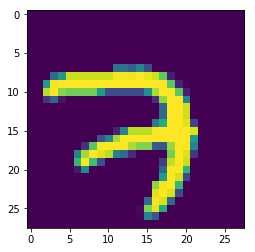

In [88]:
%pylab inline
import matplotlib.pyplot as plt

plt.imshow(sample_image)

### 設定網路參數

In [90]:
learning_rate   = 0.001
training_epochs = 15
batch_size      = 100

In [91]:
n_hidden_1 = 256 
n_hidden_2 = 256 
n_input    = 784 
n_classes  = 10 
n_samples  = mnist.train.num_examples

In [92]:
n_samples

55000

### 定義Input & Output (Placeholder)

In [93]:
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

### 建構神經網路

In [94]:
def multilayer_perceptron(x, weights, biases):  
    # First Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last Output layer
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

### 設定權重與偏倚(Variable)

In [95]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

Instructions for updating:
Colocations handled automatically by placer.


In [96]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

### 建立模型

In [97]:
pred = multilayer_perceptron(x, weights, biases)

### 設定代價函數

In [98]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



### 初始化變量

In [99]:
init = tf.global_variables_initializer()

### 訓練模型

In [100]:
Xsamp,ysamp = mnist.train.next_batch(1)

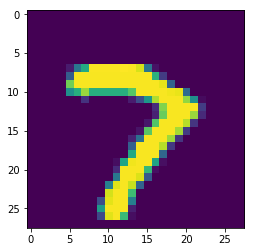

In [101]:
plt.imshow(Xsamp.reshape(28,28))

In [102]:
Xsamp,ysamp = mnist.train.next_batch(1)

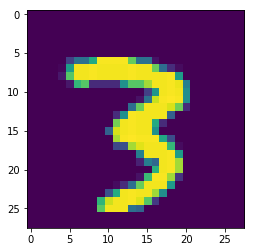

In [103]:
plt.imshow(Xsamp.reshape(28,28))

In [105]:
np.argmax(mnist.train.labels[0])

7

In [107]:
np.argmax(mnist.train.labels[1])

3

### 執行會話

In [108]:
# Start the session
sess = tf.InteractiveSession()

# Intialize all the variables
sess.run(init)

for epoch in range(training_epochs):

    # Initial the cost = 0.0
    avg_cost = 0.0

    total_batch = int(n_samples/batch_size)

    for i in range(total_batch):

        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})

        # Compute average loss
        avg_cost += c / total_batch

    print("Epoch: {} cost={}".format(epoch+1,avg_cost))

print("Training Completed in {} Epochs".format(training_epochs))

Epoch: 1 cost=171.12315888144767
Epoch: 2 cost=59.53286602887244
Epoch: 3 cost=44.0890848211809
Epoch: 4 cost=35.78415002129296
Epoch: 5 cost=30.302335824099462
Epoch: 6 cost=26.430123619166274
Epoch: 7 cost=23.425579340241185
Epoch: 8 cost=21.05482391855932
Epoch: 9 cost=19.047380067218423
Epoch: 10 cost=17.506596846905627
Epoch: 11 cost=16.127627675113352
Epoch: 12 cost=14.978338082053453
Epoch: 13 cost=13.898054177083765
Epoch: 14 cost=13.00774872855706
Epoch: 15 cost=12.246562376943501
Training Completed in 15 Epochs


### 評估模型

In [109]:
pred

<tf.Tensor 'add_5:0' shape=(?, 10) dtype=float32>

In [110]:
correct_predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

In [111]:

correct_predictions[0]

<tf.Tensor 'strided_slice:0' shape=() dtype=bool>

In [112]:
correct_predictions = tf.cast(correct_predictions, "float")

In [113]:
accuracy = tf.reduce_mean(correct_predictions)

In [114]:
print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Accuracy: 0.9122


## 使用TensorBoard 產生運算圖

### 讀取MNIST數據集

In [125]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist", one_hot=True)

Extracting ./mnist\train-images-idx3-ubyte.gz
Extracting ./mnist\train-labels-idx1-ubyte.gz
Extracting ./mnist\t10k-images-idx3-ubyte.gz
Extracting ./mnist\t10k-labels-idx1-ubyte.gz


### 設定網路參數

In [126]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [127]:
n_hidden_1 = 256 
n_hidden_2 = 256 
n_input    = 784 
n_classes  = 10 
n_samples  = mnist.train.num_examples

### 定義Placeholders

In [128]:
with tf.name_scope('inputs'):
    x = tf.placeholder("float", [None, n_input],   name= 'input_x')
    y = tf.placeholder("float", [None, n_classes], name= 'input_y')

### 產生影像檔

In [129]:
with tf.name_scope('input_reshape'):
    image_input = tf.reshape(x,[-1,28,28,1])
    tf.summary.image('input', image_input, 10)

### 建構多層神經網路

In [130]:
def add_layer(x, input_tensors, output_tensors, layer_name, activation_function = None):  
    with tf.name_scope('Layer'):
        with tf.name_scope('Weights'):
            weight = tf.Variable(tf.random_normal([input_tensors, output_tensors]), name = 'w')
            tf.summary.histogram(name = layer_name + '/Weights', values = weight)
        with tf.name_scope('Bias'):
            bias = tf.Variable(tf.random_normal([output_tensors]), name= 'b')
            tf.summary.histogram(name = layer_name + '/Bias', values = bias)
        with tf.name_scope('Wx_plus_b'):
            formula = tf.add(tf.matmul(x, weight), bias)
        if activation_function is None:
            outputs = formula
        else:
            outputs = activation_function(formula)
        tf.summary.histogram(name = layer_name + '/Outputs', values = outputs)
        return outputs

### 添加隱藏層

In [131]:
layer1 = add_layer(x, input_tensors = n_input, output_tensors = n_hidden_1, layer_name='layer1',activation_function = tf.nn.relu)
layer2 = add_layer(layer1, input_tensors = n_hidden_1, output_tensors = n_hidden_2, layer_name='layer2',activation_function = tf.nn.relu)
out_layer = add_layer(layer2, input_tensors = n_hidden_2, output_tensors = n_classes, layer_name='out_layer',activation_function = None)

### 設定代價函數

In [132]:
with tf.name_scope('cost'):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=out_layer, labels=y))
    tf.summary.scalar('loss', cost)
    
with tf.name_scope('optimizer'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
    
with tf.name_scope('Accuracy'):
    acc = tf.equal(tf.argmax(out_layer, 1), tf.argmax(y, 1))
    acc = tf.reduce_mean(tf.cast(acc, tf.float32))
    tf.summary.scalar("accuracy", acc)

### 初始化變量

In [133]:
init = tf.global_variables_initializer()

### 訓練模型

In [134]:
merged = tf.summary.merge_all()

with tf.Session() as sess:
    sess.run(init)

    ## Merge Summary
    
    writer = tf.summary.FileWriter("tensorboard3/", graph = sess.graph)

    for epoch in range(training_epochs):
        avg_cost = 0.0
        total_batch = int(n_samples/batch_size)
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            _, c, result = sess.run([optimizer, cost, merged], feed_dict={x: batch_x, y: batch_y})
            avg_cost += c / total_batch
            ## Adding summary of each step
            writer.add_summary(result,  epoch * total_batch + i)

        print("Epoch: {} cost={}".format(epoch+1,avg_cost))

    print("Training Completed in {} Epochs".format(training_epochs))

Epoch: 1 cost=160.6517251517555
Epoch: 2 cost=58.151036952625596
Epoch: 3 cost=43.25548164454378
Epoch: 4 cost=35.32615049275483
Epoch: 5 cost=30.216724882125845
Epoch: 6 cost=26.39683209484273
Epoch: 7 cost=23.5254064585946
Epoch: 8 cost=21.209221393030116
Epoch: 9 cost=19.281724179007778
Epoch: 10 cost=17.642671994512725
Epoch: 11 cost=16.26279040271586
Epoch: 12 cost=15.114895523949107
Epoch: 13 cost=14.093657624369328
Epoch: 14 cost=13.169456690468564
Epoch: 15 cost=12.380491156405773
Training Completed in 15 Epochs


## 打開tensorboard
- 1. 打開 anaconda prompt
- 2. pip uninstall tensorboard
- 3. pip install tensorboard==1.12.2
- 4. tensorboard --logdir tensorboard3/ --host 127.0.0.1
- http://127.0.0.1:6006

## 升級Numpy
- ! pip install --upgrade numpy

In [135]:
! pip install --upgrade numpy

Requirement already up-to-date: numpy in c:\programdata\anaconda3\lib\site-packages (1.16.2)


distributed 1.21.8 requires msgpack, which is not installed.
tensorflow 1.13.1 has requirement tensorboard<1.14.0,>=1.13.0, but you'll have tensorboard 1.12.2 which is incompatible.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


## 使用Keras 進行深度學習

### 安裝 Keras

In [136]:
! pip install keras

distributed 1.21.8 requires msgpack, which is not installed.
tensorflow 1.13.1 has requirement tensorboard<1.14.0,>=1.13.0, but you'll have tensorboard 1.12.2 which is incompatible.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [137]:
import keras

Using TensorFlow backend.


### 引用Keras 套件

In [138]:
from keras.datasets import mnist
from keras.models   import Sequential
from keras.optimizers import SGD
from keras.layers import Activation, Dense

### 讀取MNIST 數據

In [145]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [146]:
x_train.shape

(60000, 28, 28)

In [147]:
y_train.shape

(60000,)

In [148]:
x_test.shape

(10000, 28, 28)

In [149]:
y_test.shape

(10000,)

In [150]:
x_train = x_train.reshape(60000, 784)
x_train.shape

(60000, 784)

In [151]:
x_test = x_test.reshape(10000, 784)
x_test.shape

(10000, 784)

In [152]:
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

In [155]:
x_train /= 255
x_test  /= 255

In [157]:
#x_train[0]

In [159]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [160]:
n_classes  = 10 
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test  = keras.utils.to_categorical(y_test, n_classes)

In [161]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### 設定網路參數

In [162]:
n_hidden_1 = 256 
n_hidden_2 = 256 
n_input    = 784 
n_classes  = 10 

training_epochs = 15
batch_size = 100

### 建立神經網路

In [163]:
model = keras.Sequential()
model.add(Dense(n_hidden_1, activation='relu', input_shape=(n_input,)))
model.add(Dense(n_hidden_2, activation='relu'))
model.add(Dense(n_classes,  activation='softmax'))

In [164]:
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

### 訓練神經網路

In [165]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 2s 36us/step - loss: 1.0551 - acc: 0.7485 - val_loss: 0.4883 - val_acc: 0.8740
Epoch 2/15
60000/60000 [==============================] - 2s 35us/step - loss: 0.4246 - acc: 0.8854 - val_loss: 0.3508 - val_acc: 0.9025
Epoch 3/15
60000/60000 [==============================] - 2s 34us/step - loss: 0.3417 - acc: 0.9042 - val_loss: 0.3032 - val_acc: 0.9159
Epoch 4/15
60000/60000 [==============================] - 2s 34us/step - loss: 0.3034 - acc: 0.9145 - val_loss: 0.2760 - val_acc: 0.9215
Epoch 5/15
60000/60000 [==============================] - 2s 33us/step - loss: 0.2779 - acc: 0.9213 - val_loss: 0.2544 - val_acc: 0.9273
Epoch 6/15
60000/60000 [==============================] - 2s 33us/step - loss: 0.2580 - acc: 0.9270 - val_loss: 0.2403 - val_acc: 0.9309
Epoch 7/15
60000/60000 [==============================] - 2s 32us/step - loss: 0

### 使用Keras 分類IRIS資料

In [178]:
n_hidden_1 = 5
n_input    = 4 
n_classes  = 3 

training_epochs = 1000
batch_size = 10

In [169]:
from sklearn.datasets import load_iris
iris = load_iris()

In [170]:
X = iris.data

In [172]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [174]:
y  = keras.utils.to_categorical(iris.target, 3)

In [175]:
model = keras.Sequential()
model.add(Dense(n_hidden_1, activation='relu', input_shape=(n_input,)))
model.add(Dense(n_classes,  activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [179]:
history = model.fit(X, y,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=0)

In [181]:
print(dir(history))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_train_begin', 'on_train_end', 'params', 'set_model', 'set_params', 'validation_data']


In [183]:
history.history.keys()

dict_keys(['loss', 'acc'])

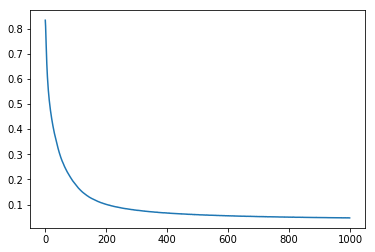

In [188]:
history.history.get('loss')
plt.plot(range(1000), history.history.get('loss'))
plt.show()

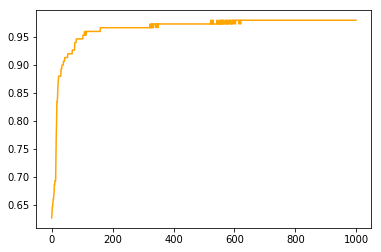

In [190]:
plt.plot(range(1000), history.history.get('acc'), c='orange')
plt.show()

## 保存模型

In [198]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 5)                 25        
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 18        
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


In [205]:
model.layers[0].get_weights()

[array([[-0.55481124,  0.03203691, -0.7702068 ,  0.55710703,  0.87413174],
        [ 0.8018876 , -0.7733567 , -0.17584126, -0.11809381, -0.40034044],
        [-1.2749116 ,  1.0904125 , -0.61432827, -1.2943448 ,  0.8226778 ],
        [-1.517978  ,  1.7419081 , -0.551778  , -0.9241399 ,  1.0553316 ]],
       dtype=float32),
 array([ 0.35401824, -0.21391538, -0.02370036,  2.2653258 ,  0.2253887 ],
       dtype=float32)]

In [207]:
model.save('iris.h5')

In [208]:
clf = keras.models.load_model('iris.h5')

In [210]:
#clf.predict(X)

## 使用類神經網路建立客戶流失預測模型

### 讀取客戶流失數據

In [212]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/customer_churn.csv', index_col=0, header = 0)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


### 資料預處理

In [214]:
X = df.iloc[:, 3:-1]
X.head(1)

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
1,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1


In [217]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 1 to 3333
Data columns (total 16 columns):
international_plan               3333 non-null object
voice_mail_plan                  3333 non-null object
number_vmail_messages            3333 non-null int64
total_day_minutes                3333 non-null float64
total_day_calls                  3333 non-null int64
total_day_charge                 3333 non-null float64
total_eve_minutes                3333 non-null float64
total_eve_calls                  3333 non-null int64
total_eve_charge                 3333 non-null float64
total_night_minutes              3333 non-null float64
total_night_calls                3333 non-null int64
total_night_charge               3333 non-null float64
total_intl_minutes               3333 non-null float64
total_intl_calls                 3333 non-null int64
total_intl_charge                3333 non-null float64
number_customer_service_calls    3333 non-null int64
dtypes: float64(8), int64(6

In [220]:
X['international_plan'] = X['international_plan'].map(lambda rec: 1 if rec == 'yes' else 0)

In [221]:
X['voice_mail_plan'] = X['voice_mail_plan'].map(lambda rec: 1 if rec == 'yes' else 0)

In [222]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 1 to 3333
Data columns (total 16 columns):
international_plan               3333 non-null int64
voice_mail_plan                  3333 non-null int64
number_vmail_messages            3333 non-null int64
total_day_minutes                3333 non-null float64
total_day_calls                  3333 non-null int64
total_day_charge                 3333 non-null float64
total_eve_minutes                3333 non-null float64
total_eve_calls                  3333 non-null int64
total_eve_charge                 3333 non-null float64
total_night_minutes              3333 non-null float64
total_night_calls                3333 non-null int64
total_night_charge               3333 non-null float64
total_intl_minutes               3333 non-null float64
total_intl_calls                 3333 non-null int64
total_intl_charge                3333 non-null float64
number_customer_service_calls    3333 non-null int64
dtypes: float64(8), int64(8)


In [216]:
y = df.iloc[:,-1]
y.head(1)

1    no
Name: churn, dtype: object

In [225]:
y = y.map(lambda rec: 1 if rec == 'yes' else 0)

### 資料標準化

In [228]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [230]:
X.shape

(3333, 16)

### 建構模型

In [231]:
model = keras.Sequential()
model.add(Dense(8, activation='relu', input_shape=(16,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1,  activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [236]:
history = model.fit(X, y,
                    batch_size=100,
                    epochs=300,
                    verbose=0)

In [245]:
model.predict(X)

array([[0.01223859],
       [0.01334006],
       [0.00434172],
       ...,
       [0.03115596],
       [0.03648429],
       [0.00230311]], dtype=float32)

In [241]:
predicted = (model.predict(X) > 0.5).flatten().astype(int)

In [242]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y, predicted)

0.9498949894989499

In [243]:
confusion_matrix(y, predicted)

array([[2814,   36],
       [ 131,  352]], dtype=int64)

### Flatten

In [246]:
a = np.array([[True], [True],[False], [False]])
a

array([[ True],
       [ True],
       [False],
       [False]])

In [247]:
a.flatten()

array([ True,  True, False, False])

In [248]:
a.flatten().astype(int)

array([1, 1, 0, 0])